In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#Import dataset
dataset = pd.read_csv("fake_job_postings.csv")

#Chose class to predict
Class = "fraudulent"

#Fill empty rows with unspecified
df = dataset['requirements'].fillna('Unspecified')

#Combine datasets
dataset = pd.merge(dataset,df)

#Remove any row that has an empty column
dataset.dropna(axis='index', inplace=True)

#Remove select columns
dataset = dataset.drop(columns=['salary_range','company_profile','description','benefits','department','job_id'])

#Encode all strings into numbers
dataset = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(dataset), columns=dataset.columns)

#Specify x and y data
OldX = dataset.drop(Class, axis = 1)
Oldy = dataset[Class]

#Oversample to get similar amounts in x and y
print('Original dataset shape %s' % Counter(Oldy))
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(OldX, Oldy)
print('Resampled dataset shape %s' % Counter(y))

print(dataset.head(5))

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({Class: set_of_classes})


print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Original dataset shape Counter({0.0: 1671, 1.0: 236})
Resampled dataset shape Counter({0.0: 1671, 1.0: 1671})
   title  location  requirements  telecommuting  has_company_logo  \
0  255.0      10.0         613.0            0.0               1.0   
1  596.0      91.0         316.0            0.0               1.0   
2  599.0     110.0         304.0            0.0               1.0   
3  269.0     100.0         414.0            0.0               1.0   
4  346.0      43.0         183.0            1.0               1.0   

   has_questions  employment_type  required_experience  required_education  \
0            1.0              1.0                  5.0                 4.0   
1            1.0              1.0                  3.0                 1.0   
2            0.0              1.0                  3.0                 7.0   
3            1.0              1.0                  5.0                 3.0   
4            0.0              1.0                  2.0                 1.0   

   ind

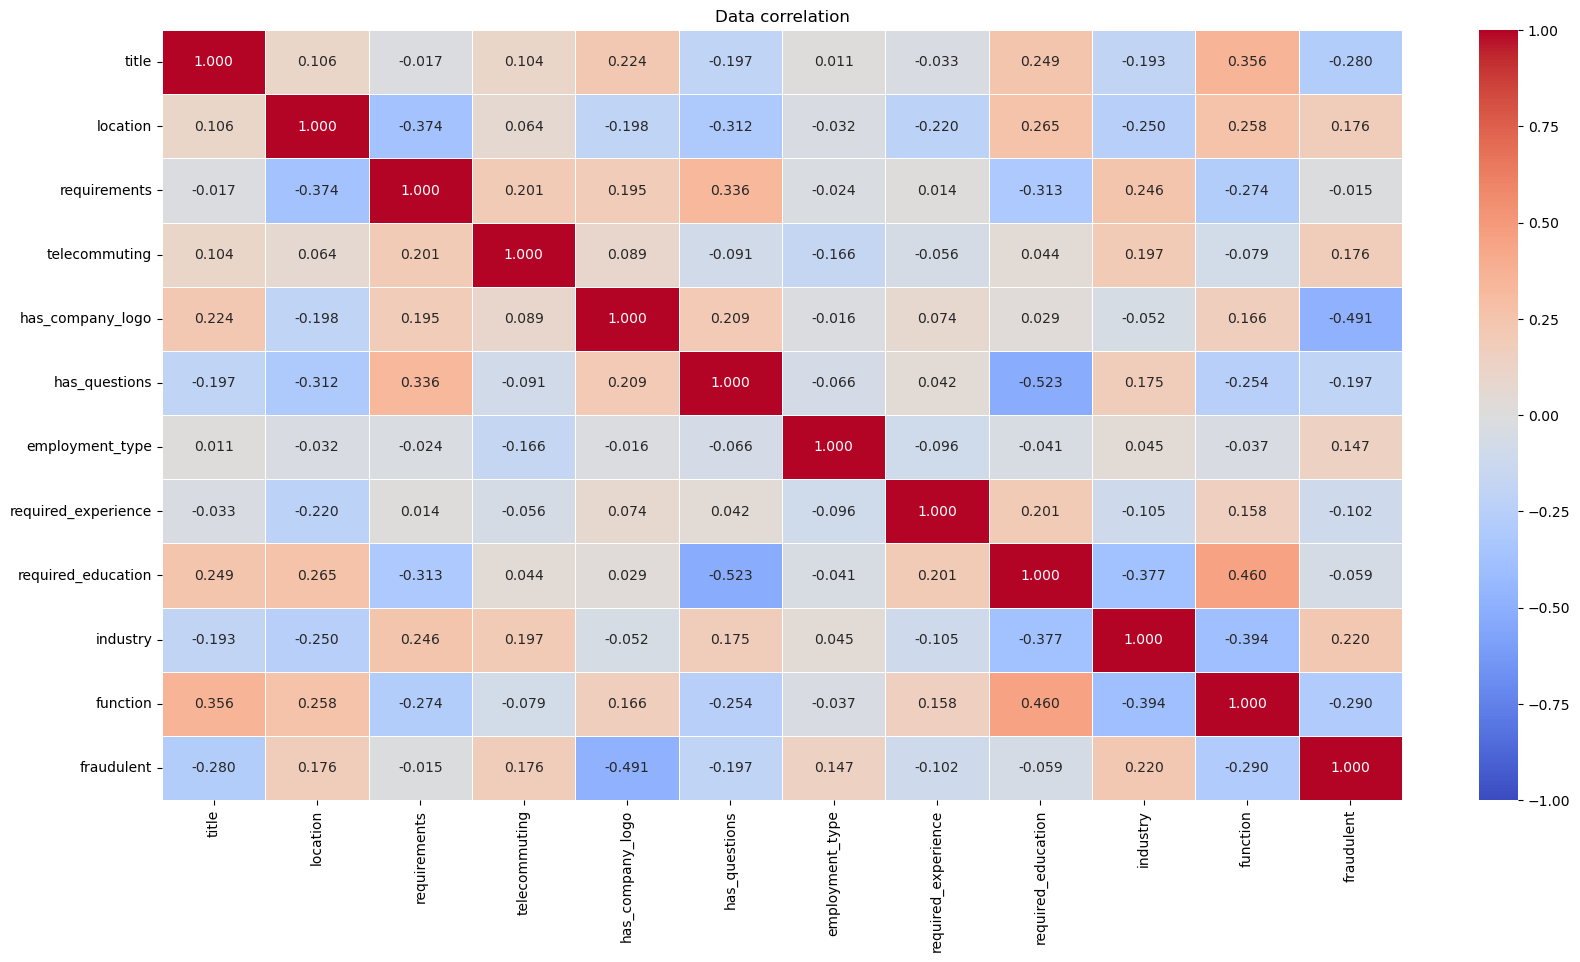

C:\Users\jet8t\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


         title  location  requirements  telecommuting  has_company_logo  \
332   0.208469  0.967593      0.004688            0.0               0.0   
2865  0.127250  0.876408      0.424390            0.0               1.0   
1117  0.872964  0.356481      0.539062            0.0               1.0   
858   0.275244  0.833333      0.582813            0.0               1.0   
2750  0.208469  0.967593      0.004688            0.0               0.0   
...        ...       ...           ...            ...               ...   
159   0.781759  0.875000      0.004688            0.0               1.0   
975   0.664495  0.148148      0.857813            0.0               1.0   
707   0.486971  0.208333      0.232813            0.0               1.0   
2506  0.224756  0.472222      0.450000            1.0               1.0   
1080  0.770358  0.699074      0.476562            0.0               1.0   

      has_questions  employment_type  required_experience  required_education  \
332             0.

In [17]:
#HeatMap
fig, ax1 = plt.subplots(figsize=(20,10))
heatmap = sb.heatmap(dataset.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.5, linecolor='white', ax=ax1)
ax1.set_title('Data correlation')
plt.show()


# Building neural network 

#splitting data into ratio 80:20
#After SMOTE data
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.2)

#before SMOTE data
data_train_old, data_test_old, class_train_old, class_test_old = train_test_split(OldX, Oldy, test_size=0.2)

# Hypertuning and figuring out best hyperparameters (provided OH from Devashree)
mlp = MLPClassifier()

mlp_old = MLPClassifier()
"""
param_grid = {
    'hidden_layer_sizes': [(100,100), (20,10), (50, 50), (10,2), (25,15), (5,5), (7,17), (35,50)],
    'activation': ['relu', 'tanh','logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': 0.15 * np.arange(1, 4),
    "max_iter": [200, 400, 800, 1000],
}
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(data_train, class_train)
"""
# Final evaluation on test data
#best_model = grid_search.best_estimator_
#pred = best_model.predict(data_test)

# print(best_model)

#Fit the model to data
#after SMOTE MLP
mlp.fit(data_train, class_train)
print(data_test)

#before SMOTE MLP

mlp_old.fit(data_train_old, class_train_old)
print(data_test_old)

In [18]:
print(best_model)

NameError: name 'best_model' is not defined

In [15]:
#Predict test data
pred = mlp.predict(data_test)
print(pred)

pred_old = mlp_old.predict(data_test_old)
print(pred_old)

from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

#Ways to report how good the model was
#after SMOTE
print("New Model after SMOTE")
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred,zero_division=1))

#before SMOTE 
print("Old Model before SMOTE")
print("Accuracy : ", accuracy_score(class_test_old, pred_old))
print("Mean Square Error : ", mean_squared_error(class_test_old, pred_old))

print(pred_old[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test_old, pred_old))

print("Classification Report : ")
print(classification_report(class_test_old, pred_old,zero_division=1))

[1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.